# Imports

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score

# Read the data

In [3]:
df_train = pd.read_csv("covid19-October20.csv")
df_test = pd.read_csv("covid19-test.csv")
df_train = df_train.sort_values('date')
df_test = df_test.sort_values('date')

# Select columns

In [4]:
cdf_train = df_train[['new_confirmed', 'new_deaths','last_available_confirmed', 'last_available_deaths']]
cdf_test = df_test[['new_confirmed', 'new_deaths','last_available_confirmed', 'last_available_deaths']]

# Create train and test split

In [5]:
train = cdf_train
test = cdf_test

# Linear regression model

In [6]:
regr = linear_model.LinearRegression()
train_x = np.asanyarray(train[['last_available_confirmed']])
train_y = np.asanyarray(train[['last_available_deaths']])

# Training data
regr.fit(train_x, train_y)

# Coefficients
print("Coefficient: ", regr.coef_)
print("Intercept: ", regr.intercept_)

Coefficient:  [[0.05234178]]
Intercept:  [-2509.20450633]


# Plotting train model

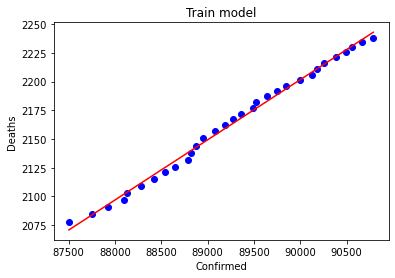

In [7]:
plt.scatter(train.last_available_confirmed, train.last_available_deaths, color='blue')
plt.plot(train_x, regr.coef_[0][0] * train_x + regr.intercept_[0], '-r')
plt.xlabel("Confirmed")
plt.ylabel("Deaths")
plt.title("Train model")
plt.show()

# Evaluation

In [8]:
test_x = np.asanyarray(test[['last_available_confirmed']])
test_y = np.asanyarray(test[['last_available_deaths']])
test_y_ = regr.predict(test_x)

# Plotting test data

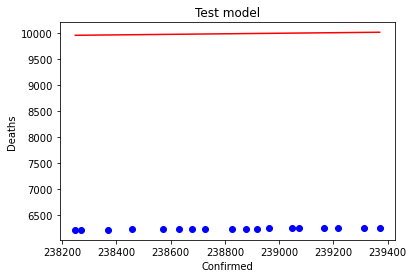

NameError: name 'mean_absolute_percentage_error' is not defined

In [15]:
plt.scatter(test_x, test_y, color='blue')
plt.plot(test_x, regr.coef_ * test_x + regr.intercept_, '-r')
plt.xlabel("Confirmed")
plt.ylabel("Deaths")
plt.title("Test model")
plt.show()

print(mean_absolute_percentage_error(test_y, test_y_))
# Accuracy rate
print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares: %.2f" % np.mean((test_y_ - test_y)**2))
print("R2-score: %.5f" % r2_score(test_y_, test_y))

# Training with the last month

In [10]:
# Read the data
df_train21 = pd.read_csv("covid19-September21.csv")

# Select columns
cdf_train21 = df_train21[['new_confirmed', 'new_deaths','last_available_confirmed', 'last_available_deaths']]

train21 = cdf_train21

# Linear regression model with the last month

In [11]:
regr21 = linear_model.LinearRegression()
train21_x = np.asanyarray(train21[['last_available_confirmed']])
train21_y = np.asanyarray(train21[['last_available_deaths']])

# Training data
regr21.fit(train21_x, train21_y)

# Coefficients
print("Coefficient: ", regr21.coef_)
print("Intercept: ", regr21.intercept_)

Coefficient:  [[0.06189817]]
Intercept:  [-8538.23476963]


# Plotting train21 model

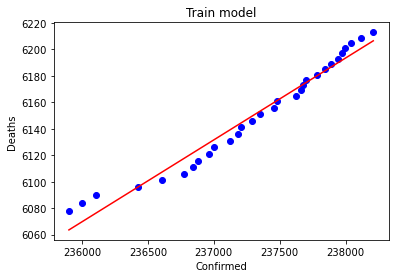

In [12]:
plt.scatter(train21.last_available_confirmed, train21.last_available_deaths, color='blue')
plt.plot(train21_x, regr21.coef_[0][0] * train21_x + regr21.intercept_[0], '-r')
plt.xlabel("Confirmed")
plt.ylabel("Deaths")
plt.title("Train model")
plt.show()

# Evaluation21

In [13]:
test21_x = np.asanyarray(test[['last_available_confirmed']])
test21_y = np.asanyarray(test[['last_available_deaths']])
test21_y_ = regr21.predict(test21_x)

# Plotting test model with the train21 equation 

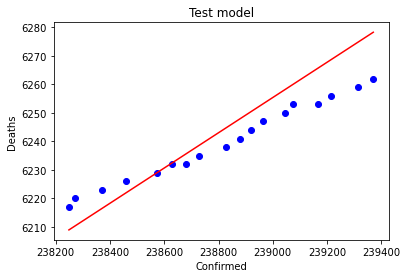

Mean absolute error: 7.51
Residual sum of squares: 76.30
R2-score: 0.82575
Variance score: 0.58


In [14]:
plt.scatter(test.last_available_confirmed, test.last_available_deaths, color='blue')
plt.plot(test21_x, regr21.coef_[0][0] * test21_x + regr21.intercept_[0], '-r')
plt.xlabel("Confirmed")
plt.ylabel("Deaths")
plt.title("Test model")
plt.show()

# Accuracy rate
print("Mean absolute error: %.2f" % np.mean(np.absolute(test21_y_ - test21_y)))
print("Residual sum of squares: %.2f" % np.mean((test21_y_ - test21_y)**2))
print("R2-score: %.5f" % r2_score(test21_y_, test21_y))

print('Variance score: %.2f' % regr21.score(test21_x, test21_y))